Dimensionality reduction using PCA for k Nearest Neighbour Classifier
group12
rollno:-AM.EN.U4EAC19052

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/machinelearning_project/

Mounted at /content/gdrive
/content/gdrive/MyDrive/machinelearning_project


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from decimal import *
import math
from scipy.stats import multivariate_normal

In [ ]:
img_path1 = "/content/gdrive/MyDrive/machinelearning_project/Gallery/TestCharacters/*"
paths1 = glob(img_path1+'*')
image_paths1 = []
person_wise1 = []
for i in range(len(paths1)):
  person_wise1.append(glob(paths1[i] + '/*'))
  image_paths1 = image_paths1 + glob(paths1[i] + '/*')
image_paths1 = np.sort(image_paths1)
data_matrix1 = np.zeros((210,1024,1))

for i in range(len(image_paths1)):
  image = cv.imread(image_paths1[i])
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  image = cv.resize(image,(32,32))
  
  image = image/255.0
  data_matrix1[i,:,:] = image.reshape(((32*32,1)))

In [ ]:
img_path = "/content/gdrive/MyDrive/machinelearning_project/Gallery/TrainCharacters/*"
paths = glob(img_path+'*')
image_paths = []
person_wise = []

paths = np.sort(paths)
for i in range(len(paths)):
  person_wise.append(glob(paths[i] + '/*'))
  image_paths = image_paths + glob(paths[i] + '/*')

data_matrix = np.zeros((400,1024,1))

for i in range(len(image_paths)):
  image = cv.imread(image_paths[i])
  
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  image = cv.resize(image,(32,32))
  image = image/255.0
  data_matrix[i,:,:] = image.reshape(((32*32,1)))

mean = np.zeros(((1024, 1)))
for i in range(400):
  mean = mean + data_matrix[i,:,:]
mean = mean/400.0

for i in range(400):
  data_matrix[i,:,:] = data_matrix[i,:,:] - mean

data = data_matrix.reshape((data_matrix.shape[0],data_matrix.shape[1]))
cov_test = np.matmul(data, data.transpose())/len(data_matrix)
op= np.linalg.eig(cov_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


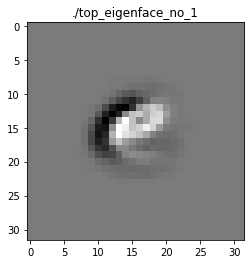

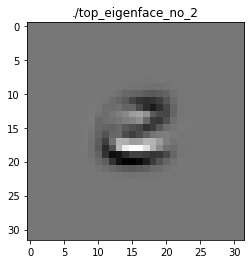

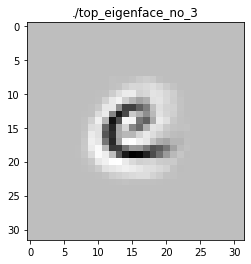

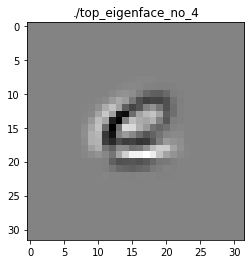

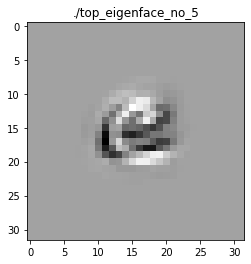

In [ ]:
op= np.linalg.eig(cov_test)

eigenfaces_matrix = np.zeros((400,1024,1))
for i in range(400):
  eigenfaces_matrix[i,:,:] = np.matmul(data.transpose(),op[1][:,i].reshape((400,1)))

sorted_op = np.argsort(op[0])
#print(sorted_op)
sum_op = sum(op[0])
variance = []
for i in range(400):
  temp = 0
  for j in range(i+1):
    temp = temp + op[0][sorted_op[-(j+1)]]
  variance.append((temp/sum_op)*100)

for i in range(5):
  plt.imshow(eigenfaces_matrix[sorted_op[-(i+1)],:,:].reshape((32, 32)),cmap='gray')
  plt.title("./top_eigenface_no_"+str(i+1))
  plt.savefig("./top_eigenface_no_"+str(i+1)+".jpeg")
  plt.show()

In [ ]:
#kmean length input and generating weights corresponding to kmean_len:
knn_len = int(input());

mvectors = np.zeros((400,knn_len,1))
for i in range(400):
  image = cv.resize(data_matrix[i,:,:]+mean,(32,32))
  mvectors[i,:,:] = getweights(image,knn_len)

10


In [ ]:
#avariation of accurary with no of eigon vectors for projection
knn_len=21
neigs_arr = [1,3,5,7,15,23,31,47,67,101]
y1 = []
for i in neigs_arr:
  print("no of top eigon vectors length = ",i)
  noof_topeigs = i
  mvectors = np.zeros((400,noof_topeigs,1))
  for i in range(400):
    image = cv.resize(data_matrix[i,:,:]+mean,(32,32))
    mvectors[i,:,:] = getweights(image,noof_topeigs)
  tmp = (knn_euclidean(noof_topeigs) + knn_mannhatten(noof_topeigs))/2
  y1.append(tmp)
  print()

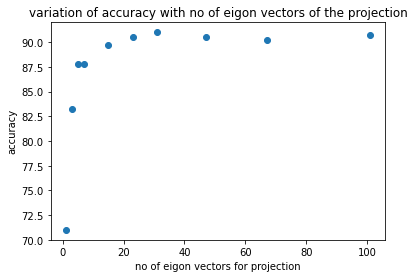

the no of eigon vectors which got highest no of accuracy =  31


In [ ]:
plt.scatter(neigs_arr,y1)
plt.title("variation of accuracy with no of eigon vectors of the projection")
plt.ylabel("accuracy")
plt.xlabel("no of eigon vectors for projection")
plt.show()
print("the no of eigon vectors which got highest no of accuracy = ",neigs_arr[np.argsort(y1)[-1::][0]])

In [ ]:
#printing the highest accuracy achived:-
print(np.sort(y1)[-1::][0])

91.0


In [ ]:
knn_arr = [1,5,15,21,51,89,131,151,199]
y2 = []
for i in knn_arr:
  print("knn length = ",i)
  knn_len = i
  noof_topeigs = 31
  mvectors = np.zeros((400,noof_topeigs,1))
  for i in range(400):
    image = cv.resize(data_matrix[i,:,:]+mean,(32,32))
    mvectors[i,:,:] = getweights(image,noof_topeigs)
  y2.append((knn_euclidean(noof_topeigs) + knn_mannhatten(noof_topeigs))/2)
  print()

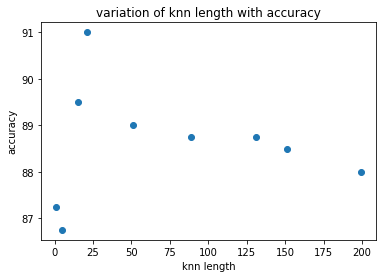

knn length for which we got the highest accuray is =  21


In [ ]:
plt.scatter(knn_arr,y2)
plt.title("variation of knn length with accuracy")
plt.ylabel("accuracy")
plt.xlabel("knn length")
plt.show()
print("knn length for which we got the highest accuray is = ",knn_arr[np.argsort(y2)[-1::][0]])

In [ ]:
print(np.sort(y2)[-1::][0])

91.0


In [ ]:
knn_len=21
neigs_arr = [1,3,5,7,15,23,31,47,67,101]
ym = []
ye = []
for i in neigs_arr:
  print("no of top eigon vectors length = ",i)
  noof_topeigs = i
  mvectors = np.zeros((400,noof_topeigs,1))
  for i in range(400):
    image = cv.resize(data_matrix[i,:,:]+mean,(32,32))
    mvectors[i,:,:] = getweights(image,noof_topeigs)
  ym.append(knn_mannhatten(noof_topeigs))
  ye.append(knn_euclidean(noof_topeigs))
  print()

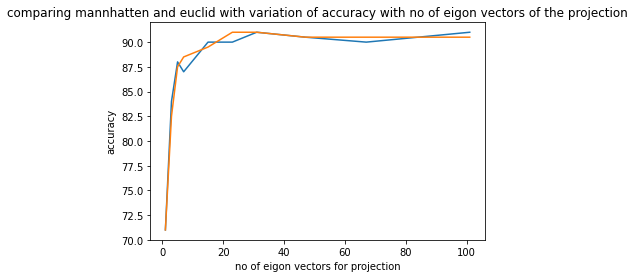

the accuracy of mannhatten at optimal no of eigon vectors =  90.0
the accuracy of mannhatten at optimal no of eigon vectors =  91.0


In [ ]:
plt.plot(neigs_arr,ye)
plt.plot(neigs_arr,ym)
plt.title("comparing mannhatten and euclid with variation of accuracy with no of eigon vectors of the projection")
plt.ylabel("accuracy")
plt.xlabel("no of eigon vectors for projection")
plt.show()
print("the accuracy of mannhatten at optimal no of eigon vectors = ",ye[5])
print("the accuracy of mannhatten at optimal no of eigon vectors = ",ym[5])

In [ ]:
knn_arr = [1,5,15,21,51,89,131,151,199]
y4 = []
for i in knn_arr:
  print("knn length = ",i)
  knn_len = i
  noof_topeigs = 31
  mvectors = np.zeros((400,noof_topeigs,1))
  for j in range(400):
    image = cv.resize(data_matrix[j,:,:]+mean,(32,32))
    mvectors[j,:,:] = getweights(image,noof_topeigs)
  y4.append(weighted_knn(noof_topeigs))
  print()

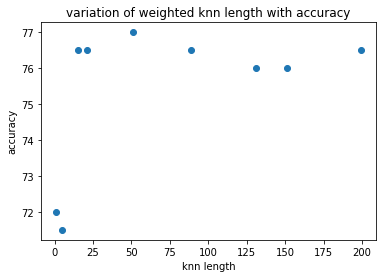

weighted knn length for which we got the highest accuray is =  21


In [ ]:
plt.scatter(knn_arr,y4)
plt.title("variation of weighted knn length with accuracy")
plt.ylabel("accuracy")
plt.xlabel("knn length")
plt.show()
print("weighted knn length for which we got the highest accuray is = ",knn_arr[np.argsort(y2)[-1::][0]])

In [ ]:
def mannhatten(v1,v2):
  n = len(v1)
  res=0
  for i in range(n):
    res+=abs(v1[i]-v2[i])
  return res
def euclidean(v1,v2):
  n = len(v2)
  res = 0
  for i in range(n):
    res+=(v1[i]-v2[i])*(v1[i]-v2[i])
  res = math.sqrt(res)
  return res

In [ ]:
def weighted_knn(neigs):
  global knn_len
  print("weighted knn using euclidean as a distance parameter")
  noofes=0;noofcs=0;
  for i in range(110,210):
    image = cv.resize(data_matrix1[i,:,:],(32,32))
    inputw = getweights(image,neigs)
    dist = np.zeros((400,1))

    for i in range(400):
      dist[i,:] = euclidean(inputw,mvectors[i,:,:])
    ind = np.argsort(dist[:,0])
    freqe=0;freqc=0;
    for i in range(knn_len):
      if ind[i]+1>200:
        freqc+=(1/dist[ind[i]])
      else:
        freqe+=(1/dist[ind[i]])
    if(freqe>freqc):
      noofes+=1
    else:
      noofcs+=1
    #print(freqe,freqc)
  accuracyofc=100*(noofcs/(noofes+noofcs))
  print("the accuracy of the char c images = ",accuracyofc,"%")

  noofes=0;noofcs=0;
  for i in range(0,100):
    image = cv.resize(data_matrix1[i,:,:],(32,32))
    inputw = getweights(image,neigs)
    dist = np.zeros((400,1))

    for i in range(400):
      dist[i,:] = euclidean(inputw,mvectors[i,:,:])
    ind = np.argsort(dist[:,0])
    freqe=0;freqc=0;
    for i in range(knn_len):
      if ind[i]+1>200:
        freqc+=1/dist[ind[i]]
      else:
        freqe+=1/dist[ind[i]]
    if(freqe>freqc):
      noofes+=1
    else:
      noofcs+=1
  accuracyofe=100*(noofes/(noofes+noofcs))
  print("the accuracy of the char e images = ",accuracyofe,"%")
  return (accuracyofc+accuracyofe)/2

In [ ]:
#test input
def knn_mannhatten(neigs):
  global knn_len
  
  #knn:--
  print("knn using mannhatteen as a distance parameter")
  noofes=0;noofcs=0;
  for i in range(110,210):
    image = cv.resize(data_matrix1[i,:,:],(32,32))
    inputw = getweights(image,neigs)
    dist = np.zeros((400,1))

    for i in range(400):
      dist[i,:] = mannhatten(inputw,mvectors[i,:,:])
    ind = np.argsort(dist[:,0])
    k=10
    cnte=0;cntc=0;
    for i in range(knn_len):
      if ind[i]+1>200:
        cntc+=1
      else:
        cnte+=1
    if(cnte>cntc):
      noofes+=1
    else:
      noofcs+=1
  accuracyofc=100*(noofcs/(noofes+noofcs))
  print("the accuracy of the char c images = ",accuracyofc,"%")

  noofes=0;noofcs=0;
  for i in range(0,100):
    image = cv.resize(data_matrix1[i,:,:],(32,32))
    inputw = getweights(image,neigs)
    dist = np.zeros((400,1))

    for i in range(400):
      dist[i,:] = mannhatten(inputw,mvectors[i,:,:])
    ind = np.argsort(dist[:,0])
    k=10
    cnte=0;cntc=0;
    for i in range(knn_len):
      if ind[i]+1>200:
        cntc+=1
      else:
        cnte+=1
    if(cnte>cntc):
      noofes+=1
    else:
      noofcs+=1
  accuracyofe=100*(noofes/(noofes+noofcs))
  print("the accuracy of the char e images = ",accuracyofe,"%")
  return (accuracyofc+accuracyofe)/2

In [ ]:
def knn_euclidean(neigs):
  global knn_len
  print("knn using euclidean as a distance parameter")
  noofes=0;noofcs=0;
  for i in range(110,210):
    image = cv.resize(data_matrix1[i,:,:],(32,32))
    inputw = getweights(image,neigs)
    dist = np.zeros((400,1))

    for i in range(400):
      dist[i,:] = euclidean(inputw,mvectors[i,:,:])
    ind = np.argsort(dist[:,0])
    cnte=0;cntc=0;
    for i in range(knn_len):
      if ind[i]+1>200:
        cntc+=1
      else:
        cnte+=1
    if(cnte>cntc):
      noofes+=1
    else:
      noofcs+=1
  accuracyofc=100*(noofcs/(noofes+noofcs))
  print("the accuracy of the char c images = ",accuracyofc,"%")

  noofes=0;noofcs=0;
  for i in range(0,100):
    image = cv.resize(data_matrix1[i,:,:],(32,32))
    inputw = getweights(image,neigs)
    dist = np.zeros((400,1))

    for i in range(400):
      dist[i,:] = euclidean(inputw,mvectors[i,:,:])
    ind = np.argsort(dist[:,0])
    cnte=0;cntc=0;
    for i in range(knn_len):
      if ind[i]+1>200:
        cntc+=1
      else:
        cnte+=1
    if(cnte>cntc):
      noofes+=1
    else:
      noofcs+=1
  accuracyofe=100*(noofes/(noofes+noofcs))
  print("the accuracy of the char e images = ",accuracyofe,"%")
  return (accuracyofc+accuracyofe)/2

In [ ]:
def getweights(image,num):
  image_with_mean = image.reshape((image.shape[0]*image.shape[1],1))
  image_mean_center = image_with_mean - mean
  weights = np.zeros((num,1))
  for i in range(num):
    weights[i]=np.dot(eigenfaces_matrix[sorted_op[-(i+1)]].T[0],image_mean_center.T[0])

  for i in range(num):
    weights[i][0] = weights[i][0]/np.linalg.norm(eigenfaces_matrix[sorted_op[-(i+1)]].reshape(eigenfaces_matrix[sorted_op[-(i+1)]].shape[0],))

  image_with_mean = image.reshape((image.shape[0]*image.shape[1],1))
  return weights


def show_wimg(weights,num):
  global eigenfaces_matrix
  global sorted_op
  global mean
  face_rec_final = np.zeros((1024,1))
  face_rec = np.zeros((1024,1))
  for i in range(num):
    face_rec = face_rec + (weights[i][0] * eigenfaces_matrix[sorted_op[-(i+1)],:,:])
  face_rec = face_rec + mean
  face_rec = (face_rec - np.amin(face_rec))/(np.amax(face_rec)-np.amin(face_rec))
  face_rec_final = face_rec
  img_reconstruct_fin = (face_rec_final)# return  val

  plt.imshow(img_reconstruct_fin.reshape((32, 32)),)
  plt.title("reconstructed_image")
  plt.savefig("./reconstructed_face_"+str(num)+".jpeg")
  plt.show()
  


In [ ]:
def compresed_img_vector(num):
  global eigenfaces_matrix
  global sorted_op
  global mean
  global weights
  #mse = []
  face_rec_final = np.zeros((1024,1))
  face_rec = np.zeros((1024,1))
  for i in range(num):
    face_rec = face_rec + (weights[sorted_op[-(i+1)]][0] * eigenfaces_matrix[sorted_op[-(i+1)],:,:])
  face_rec = face_rec + mean
  face_rec = (face_rec - np.amin(face_rec))/(np.amax(face_rec)-np.amin(face_rec))
  face_rec_final = face_rec
  return (face_rec_final)

In [ ]:
def img_reconstruct1(num):
  global eigenfaces_matrix
  global sorted_op
  global mean
  global weights
  #mse = []
  face_rec_final = np.zeros((1024,1))
  face_rec = np.zeros((1024,1))
  for i in range(num):
    face_rec = face_rec + (weights[sorted_op[-(i+1)]][0] * eigenfaces_matrix[sorted_op[-(i+1)],:,:])
  face_rec = face_rec + mean
  face_rec = (face_rec - np.amin(face_rec))/(np.amax(face_rec)-np.amin(face_rec))
  face_rec_final = face_rec
  return (face_rec_final)